# Fashion MNIST using Keras

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
import pandas as pd

Using TensorFlow backend.


0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

In [2]:
train = pd.read_csv(r'./data/fashion-mnist_train.csv')
test = pd.read_csv(r'./data/fashion-mnist_test.csv')
train.head()# few rows

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Standardization
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

x_train = train_data[:, 1:] / 255#column 1 to last
y_train = train_data[:, 0]#first column
#Similar
x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2018)

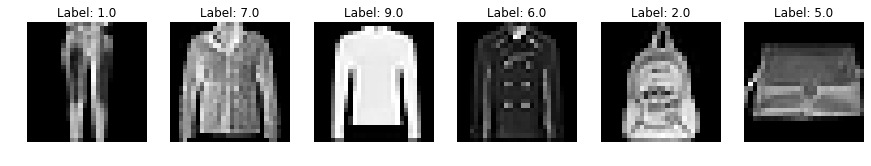

In [5]:
idx = [0,100,250,500,800,1500]
N = len(idx)
plt.figure(figsize=(15,15))
for i in range(N):
    plt.subplot(1,N, i+1)
    image = x_train[i, :].reshape((28, 28))
    plt.imshow(image, cmap='gray')
    plt.title("Label: {}".format(y_train[idx[i]]))
    plt.axis('off')
plt.show()

In [6]:
print(x_train.shape)
print(type(x_train))

(48000, 784)
<class 'numpy.ndarray'>


In [7]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_val = x_val.reshape(x_val.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_val.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [8]:
def createModel():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))# number of classes
    return model

In [9]:
model1=createModel()

In [10]:
#Not one-hot encoded; Sparse
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(
    log_dir=r'.\data\logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

In [12]:
history1 = model1.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.4814 - acc: 0.8292 - val_loss: 0.3030 - val_acc: 0.8942
Epoch 2/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.2829 - acc: 0.8961 - val_loss: 0.2746 - val_acc: 0.9010
Epoch 3/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.2416 - acc: 0.9103 - val_loss: 0.2646 - val_acc: 0.9066
Epoch 4/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.2113 - acc: 0.9209 - val_loss: 0.2568 - val_acc: 0.9084
Epoch 5/10
48000/48000 [==============================] - 2s 36us/step - loss: 0.1878 - acc: 0.9297 - val_loss: 0.2522 - val_acc: 0.9102
Epoch 6/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.1705 - acc: 0.9355 - val_loss: 0.2530 - val_acc: 0.9132
Epoch 7/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1599 - acc: 0.9405 - val_loss: 0.2654 - val_acc

Text(0.5, 1.0, 'Accuracy Curves')

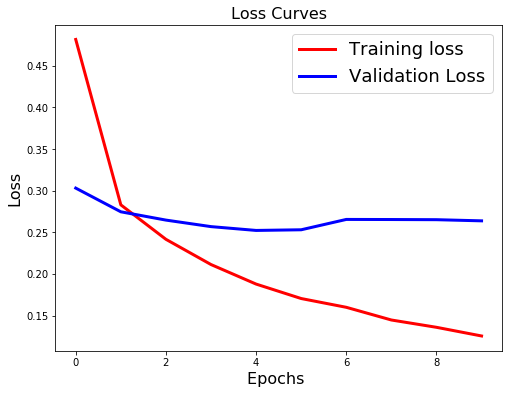

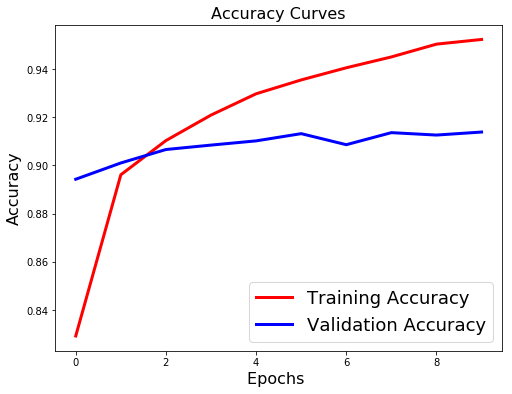

In [13]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [14]:
def createModel2():
    classifier = Sequential()#Initialize 

    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', input_shape=im_shape, activation='relu'))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.5))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.5))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.5))
    classifier.add(Flatten())
    classifier.add(Dense(units=128, activation='relu'))
    classifier.add(Dropout(0.5))
    classifier.add(Dense(units=64, activation='relu'))
    classifier.add(Dense(units=32, activation='relu'))
    classifier.add(Dense(units=10, activation='softmax'))
    
    return classifier

In [19]:
#Model 1 - Overfitting
model2=createModel2()

In [20]:
#Not one-hot encoded; Sparse
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history2 = model2.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=200, verbose=1,
    validation_data=(x_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 3s 69us/step - loss: 1.5372 - acc: 0.3918 - val_loss: 0.7471 - val_acc: 0.7138
Epoch 2/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.8011 - acc: 0.6994 - val_loss: 0.5911 - val_acc: 0.7667
Epoch 3/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.6550 - acc: 0.7527 - val_loss: 0.5096 - val_acc: 0.8137
Epoch 4/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.5847 - acc: 0.7803 - val_loss: 0.4544 - val_acc: 0.8214
Epoch 5/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.5434 - acc: 0.7961 - val_loss: 0.4319 - val_acc: 0.8232
Epoch 6/200
48000/48000 [==============================] - 3s 55us/step - loss: 0.5017 - acc: 0.8157 - val_loss: 0.4019 - val_acc: 0.8440
Epoch 7/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.4805 - acc: 0.8220 - val_loss: 0.3608 - 

48000/48000 [==============================] - 3s 57us/step - loss: 0.2421 - acc: 0.9131 - val_loss: 0.2165 - val_acc: 0.9228
Epoch 60/200
48000/48000 [==============================] - 3s 59us/step - loss: 0.2407 - acc: 0.9126 - val_loss: 0.2119 - val_acc: 0.9228
Epoch 61/200
48000/48000 [==============================] - 3s 55us/step - loss: 0.2386 - acc: 0.9128 - val_loss: 0.2158 - val_acc: 0.9223
Epoch 62/200
48000/48000 [==============================] - 3s 59us/step - loss: 0.2386 - acc: 0.9144 - val_loss: 0.2121 - val_acc: 0.9239
Epoch 63/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.2352 - acc: 0.9152 - val_loss: 0.2116 - val_acc: 0.9238
Epoch 64/200
48000/48000 [==============================] - 3s 59us/step - loss: 0.2392 - acc: 0.9130 - val_loss: 0.2107 - val_acc: 0.9249
Epoch 65/200
48000/48000 [==============================] - 3s 58us/step - loss: 0.2321 - acc: 0.9149 - val_loss: 0.2160 - val_acc: 0.9231
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.2081 - acc: 0.9230 - val_loss: 0.2048 - val_acc: 0.9279
Epoch 119/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.2066 - acc: 0.9264 - val_loss: 0.2011 - val_acc: 0.9293
Epoch 120/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.2019 - acc: 0.9272 - val_loss: 0.2097 - val_acc: 0.9291
Epoch 121/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.2040 - acc: 0.9260 - val_loss: 0.1996 - val_acc: 0.9294
Epoch 122/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.2060 - acc: 0.9249 - val_loss: 0.1977 - val_acc: 0.9314
Epoch 123/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.2012 - acc: 0.9268 - val_loss: 0.1980 - val_acc: 0.9307
Epoch 124/200
48000/48000 [==============================] - 3s 60us/step - loss: 0.2002 - acc: 0.9278 - val_loss: 0.1970 - val_acc: 0.9307
Epoch 125/200
48000/

48000/48000 [==============================] - 3s 56us/step - loss: 0.1874 - acc: 0.9315 - val_loss: 0.1955 - val_acc: 0.9313
Epoch 177/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.1865 - acc: 0.9324 - val_loss: 0.1924 - val_acc: 0.9309
Epoch 178/200
48000/48000 [==============================] - 3s 58us/step - loss: 0.1858 - acc: 0.9333 - val_loss: 0.1965 - val_acc: 0.9304
Epoch 179/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.1860 - acc: 0.9322 - val_loss: 0.1950 - val_acc: 0.9312
Epoch 180/200
48000/48000 [==============================] - 3s 56us/step - loss: 0.1844 - acc: 0.9341 - val_loss: 0.1975 - val_acc: 0.9304
Epoch 181/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.1841 - acc: 0.9318 - val_loss: 0.1949 - val_acc: 0.9348
Epoch 182/200
48000/48000 [==============================] - 3s 57us/step - loss: 0.1839 - acc: 0.9326 - val_loss: 0.2048 - val_acc: 0.9291
Epoch 183/200
48000/48000 [=======

Text(0.5, 1.0, 'Accuracy Curves')

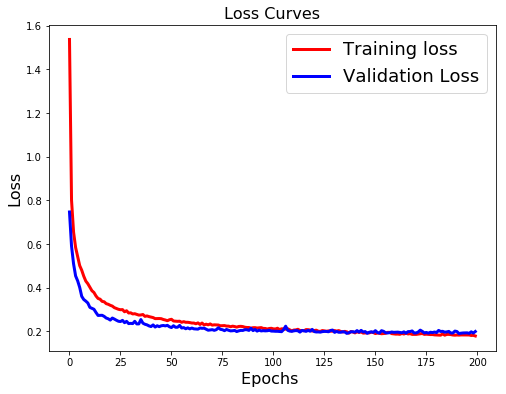

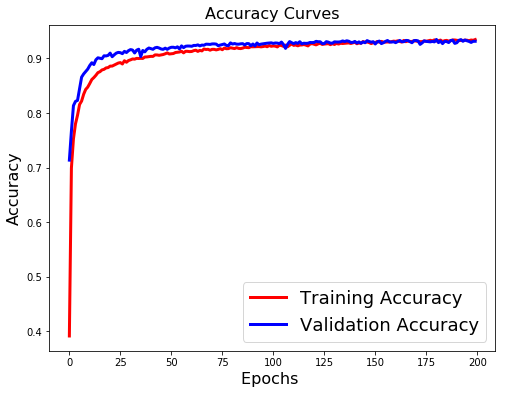

In [22]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [23]:
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 59us/step


[0.1726379780702293, 0.9367]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model2.predict(x_test)
#print (Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print (y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[898   0  17  11   1   0  71   0   2   0]
 [  0 992   0   5   1   0   2   0   0   0]
 [ 14   0 908  11  29   1  37   0   0   0]
 [ 11   1   2 955  15   0  15   0   0   1]
 [  0   0  23  22 888   0  66   0   1   0]
 [  0   1   0   0   0 979   0  18   1   1]
 [102   0  30  20  30   0 813   0   5   0]
 [  0   0   0   0   0   0   0 989   0  11]
 [  0   0   2   1   1   2   3   0 991   0]
 [  0   0   0   0   0   2   0  44   0 954]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1000
         1.0       1.00      0.99      0.99      1000
         2.0       0.92      0.91      0.92      1000
         3.0       0.93      0.95      0.94      1000
         4.0       0.92      0.89      0.90      1000
         5.0       0.99      0.98      0.99      1000
         6.0       0.81      0.81      0.81      1000
         7.0       0.94      0.99      0.96      1000
         8.0       0.99      0.99      0.99      1000
         9.0       0.99      0.95      0.97      1000

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [26]:
model1.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/step


[0.24624211258888246, 0.9184]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model1.predict(x_test)
#print (Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print (y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[860   2  14  12   1   0 101   1   9   0]
 [  0 990   3   4   0   0   3   0   0   0]
 [ 13   1 837  13  56   0  77   0   3   0]
 [ 14  13   3 935  20   0  14   0   1   0]
 [  2   0  35  20 884   0  58   0   1   0]
 [  0   1   0   0   0 962   0  24   2  11]
 [ 91   6  37  25  38   1 795   0   7   0]
 [  0   0   0   0   0   3   0 970   0  27]
 [  4   1   1   0   1   2   6   1 983   1]
 [  0   0   0   0   0   1   0  31   0 968]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1000
         1.0       0.98      0.99      0.98      1000
         2.0       0.90      0.84      0.87      1000
         3.0       0.93      0.94      0.93      1000
         4.0       0.88      0.88      0.88      1000
         5.0       0.99      0.96      0.98      1000
         6.0       0.75      0.80      0.77      1000
         7.0       0.94      0.97      0.96      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.96      0.97      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

